In [1]:
#importing essential libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

In [2]:

df=pd.read_csv(r"C:\Users\anand\Downloads\Micro-Credit-Project--1---1-\Micro Credit Project\Data file.csv")
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

In [3]:
df2=pd.read_excel(r"C:\Users\anand\Downloads\Micro-Credit-Project--1---1-\Micro Credit Project\Data_Description.xlsx")
df2

Unnamed: 0  label      msisdn  aon  daily_decr30  daily_decr90  rental30  \
0           1      1  4022154989  155   2111.000000       3018.71      0.00   
1           2      1  8984212438  137  18017.682000      18052.41    629.92   
2           3      0  6356838509  122   5662.625333       5672.28    467.24   
3           4      1  1169470878  144   4288.500000       4313.48   4647.51   
4           5      1  1292895185   94   1618.800000       1634.75   1096.49   
5           6      1  6128973512  124   9425.000000      16805.83    696.92   

   rental90  last_rech_date_ma  last_rech_date_da  ...  maxamnt_loans30  \
0    267.60                 50                NaN  ...               12   
1    749.92                 13                NaN  ...               12   
2    518.46                  2                NaN  ...                6   
3   4765.11                 23                NaN  ...                6   
4   1059.71                  1                NaN  ...                6   
5   1909.19                  1                NaN  ...                6   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 2.0            1            12               12   
1                 0.0            4            30               12   
2                 0.0            3            18                6   
3                 0.5            2            12                6   
4                 0.5            2            12                6   
5                 0.0            5            30                6   

   medianamnt_loans90  payback30  payback90  pcircle       pdate  
0                 2.0        NaN        NaN      UPW  2016-08-12  
1                 0.0        4.0        3.0      UPW  2016-07-24  
2                 0.0       13.0       13.0      UPW  2016-07-13  
3                 0.5        NaN        NaN      UPW  2016-07-30  
4                 0.5        NaN        NaN      UPW  2016-07-06  
5                 0.0        4.0        4.0      UPW  2016-08-14  

[6 rows x 37 columns]

In [4]:
df.sample()

Unnamed: 0  label       msisdn   aon  daily_decr30  daily_decr90  \
184203      184204      1  58769I90848  56.0     27.811333     27.811333   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
184203    665.86    665.86                0.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
184203              6.0                 0.0          1.0             6   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
184203                6                 0.0        0.0        0.0      UPW   

             pdate  
184203  2016-06-13  

[1 rows x 37 columns]

In [5]:
df2.sample()

Unnamed: 0  label      msisdn  aon  daily_decr30  daily_decr90  rental30  \
3           4      1  1169470878  144        4288.5       4313.48   4647.51   

   rental90  last_rech_date_ma  last_rech_date_da  ...  maxamnt_loans30  \
3   4765.11                 23                NaN  ...                6   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
3                 0.5            2            12                6   

   medianamnt_loans90  payback30  payback90  pcircle       pdate  
3                 0.5        NaN        NaN      UPW  2016-07-30  

[1 rows x 37 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape,df2.shape

((209593, 37), (6, 37))

In [10]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [11]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [12]:
df.corr()

Unnamed: 0     label       aon  daily_decr30  \
Unnamed: 0              1.000000  0.000403 -0.002048      0.002739   
label                   0.000403  1.000000 -0.003785      0.168298   
aon                    -0.002048 -0.003785  1.000000      0.001104   
daily_decr30            0.002739  0.168298  0.001104      1.000000   
daily_decr90            0.003077  0.166150  0.000374      0.977704   
rental30               -0.003906  0.058085 -0.000960      0.442066   
rental90               -0.003459  0.075521 -0.000790      0.458977   
last_rech_date_ma      -0.001853  0.003728  0.001692      0.000487   
last_rech_date_da      -0.001133  0.001711 -0.001693     -0.001636   
last_rech_amt_ma       -0.001064  0.131804  0.004256      0.275837   
cnt_ma_rech30           0.003320  0.237331 -0.003148      0.451385   
fr_ma_rech30            0.003181  0.001330 -0.001163     -0.000577   
sumamnt_ma_rech30       0.000123  0.202828  0.000707      0.636536   
medianamnt_ma_rech30   -0.001371  0.141490  0.004306      0.295356   
medianmarechprebal30    0.001258 -0.004829  0.003930     -0.001153   
cnt_ma_rech90           0.002329  0.236392 -0.002725      0.587338   
fr_ma_rech90           -0.000249  0.084385  0.004401     -0.078299   
sumamnt_ma_rech90       0.000523  0.205793  0.001011      0.762981   
medianamnt_ma_rech90   -0.000298  0.120855  0.004909      0.257847   
medianmarechprebal90   -0.001947  0.039300 -0.000859      0.037495   
cnt_da_rech30           0.000888  0.003827  0.001564      0.000700   
fr_da_rech30           -0.002504 -0.000027  0.000892     -0.001499   
cnt_da_rech90          -0.001324  0.002999  0.001121      0.038814   
fr_da_rech90           -0.002827 -0.005418  0.005395      0.020673   
cnt_loans30             0.001725  0.196283 -0.001826      0.366116   
amnt_loans30            0.002387  0.197272 -0.001726      0.471492   
maxamnt_loans30         0.000698  0.000248 -0.002764     -0.000028   
medianamnt_loans30     -0.002005  0.044589  0.004664     -0.011610   
cnt_loans90             0.002241  0.004733 -0.000611      0.008962   
amnt_loans90            0.000781  0.199788 -0.002319      0.563496   
maxamnt_loans90         0.001742  0.084144 -0.001191      0.400199   
medianamnt_loans90     -0.002615  0.035747  0.002771     -0.037305   
payback30              -0.000040  0.048336  0.001940      0.026915   
payback90               0.002411  0.049183  0.002203      0.047175   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
Unnamed: 0                0.003077 -0.003906 -0.003459          -0.001853   
label                     0.166150  0.058085  0.075521           0.003728   
aon                       0.000374 -0.000960 -0.000790           0.001692   
daily_decr30              0.977704  0.442066  0.458977           0.000487   
daily_decr90              1.000000  0.434685  0.471730           0.000908   
rental30                  0.434685  1.000000  0.955237          -0.001095   
rental90                  0.471730  0.955237  1.000000          -0.001688   
last_rech_date_ma         0.000908 -0.001095 -0.001688           1.000000   
last_rech_date_da        -0.001886  0.003261  0.002794           0.001790   
last_rech_amt_ma          0.264131  0.127271  0.121416          -0.000147   
cnt_ma_rech30             0.426707  0.233343  0.230260           0.004311   
fr_ma_rech30             -0.000343 -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30         0.603886  0.272649  0.259709           0.002105   
medianamnt_ma_rech30      0.282960  0.129853  0.120242          -0.001358   
medianmarechprebal30     -0.000746 -0.001415 -0.001237           0.004071   
cnt_ma_rech90             0.593069  0.312118  0.345293           0.004263   
fr_ma_rech90             -0.079530 -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90         0.768817  0.342306  0.360601           0.002243   
medianamnt_ma_rech90      0.250518  0.110356  0.103151          -0.000726   
medianmarechprebal90      0.036

In [13]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

In [14]:
df=df.drop(df.columns[0], axis=1)
df=df.drop(df.columns[34], axis=1)
df["pdate"] = pd.to_datetime(df["pdate"])

since one column is of onbject type

## Encoding:

In [15]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [16]:
df['msisdn']= label_encoder.fit_transform(df['msisdn'])
  
df['msisdn'].unique()

array([ 40191, 142291,  33594, ...,  42866, 111388, 121263])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 209593 non-null  int64         
 1   msisdn                209593 non-null  int32         
 2   aon                   209593 non-null  float64       
 3   daily_decr30          209593 non-null  float64       
 4   daily_decr90          209593 non-null  float64       
 5   rental30              209593 non-null  float64       
 6   rental90              209593 non-null  float64       
 7   last_rech_date_ma     209593 non-null  float64       
 8   last_rech_date_da     209593 non-null  float64       
 9   last_rech_amt_ma      209593 non-null  int64         
 10  cnt_ma_rech30         209593 non-null  int64         
 11  fr_ma_rech30          209593 non-null  float64       
 12  sumamnt_ma_rech30     209593 non-null  float64       
 13 

In [18]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

data is skewed

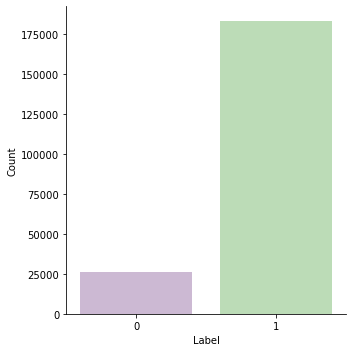

In [19]:
g=sns.catplot(x="label",data=df,kind="count",palette="PRGn",alpha=1)
g.set(xlabel="Label",ylabel="Count")
plt.show()

In [20]:
print(sum(df['label']==0))
print(sum(df['label']==1))
len(df.index)

26162
183431


209593

In [21]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['label']==1)] 
df_minority = df[(df['label']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 101177, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [22]:
df=df_upsampled

In [23]:
df

label  msisdn     aon  daily_decr30  daily_decr90  rental30  rental90  \
189254      0   67626   924.0   3916.932000   3951.360000    298.58    468.63   
126319      0   52936   169.0   2759.750000   2772.500000   6430.28   8328.50   
6932        0  183127   361.0      0.033333      0.033333     22.70     22.70   
42999       0   77372  1165.0      6.500000      6.500000     24.96     24.96   
173422      0   34829   584.0   5009.173333   5042.650000    660.93   1380.55   
...       ...     ...     ...           ...           ...       ...       ...   
209588      1   42866   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  178248  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1   53995  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  111388  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  121263  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
189254               20.0                0.0              1539  ...   
126319                3.0                0.0               770  ...   
6932                  0.0                0.0                 0  ...   
42999                 8.0                0.0              1547  ...   
173422                9.0                0.0               770  ...   
...                   ...                ...               ...  ...   
209588                1.0                0.0              4048  ...   
209589                4.0                0.0               773  ...   
209590                3.0                0.0              1539  ...   
209591                2.0               38.0               773  ...   
209592               13.0                0.0              7526  ...   

        amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
189254             6              6.0                 0.0          2.0   
126319            12             12.0                 0.0          1.0   
6932               6              6.0                 0.0          1.0   
42999              6              6.0                 0.0          1.0   
173422            18              6.0                 0.0          5.0   
...              ...              ...                 ...          ...   
209588            12              6.0                 0.0          2.0   
209589            18              6.0                 0.0          3.0   
209590            42             12.0                 0.0          6.0   
209591            18             12.0                 0.0          3.0   
209592            18             12.0                 0.0          2.0   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
189254            12                6                 0.0   0.000000   
126319            12               12                 0.0   0.000000   
6932               6                6                 0.0   0.000000   
42999              6                6                 0.0   0.000000   
173422            30                6                 0.0   5.666667   
...              ...              ...                 ...        ...   
209588            12                6                 0.0   1.000000   
209589            18                6                 0.0   1.000000   
209590            54               12                 0.0   4.000000   
209591            24               12                 0.0   0.000000   
209592            18               12                 0.0   0.000000   

        payback90      pdate  
189254   4.500000 2016-07-19  
126319   0.000000 2016-07-17  
6932     0.000000 2016-06-02  
42999    0.000000 2016-06-13  
173422   5.000000 2016-07-22  
...           ...        ...  
209588   1.000000 2016-06-17  
209589   1.000000 2016-06-12  
209590   3.833333 2016-07-29  
209591  10.500000 2016-07-25  
209592   0.000000 2016-07-07  

[284608 rows x 35 columns]

In [24]:
g=sns.catplot(x="label",data=df,kind="count",palette="PRGn",alpha=1)
g.set(xlabel="Label",ylabel="Count")
plt.show()

## Checking outliers:

In [25]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

###### number of outliers are present

the  no. of outliers are so much so we can not loose so much data.

## Descriptive statstics:

In [26]:
df.describe()

label         msisdn            aon   daily_decr30  \
count  284608.000000  284608.000000  284608.000000  284608.000000   
mean        0.644504   93013.164345    8361.143056    4297.170802   
std         0.478664   53811.188596   77009.007947    8274.322828   
min         0.000000       0.000000     -48.000000     -93.012667   
25%         0.000000   46272.750000     223.000000      21.349500   
50%         1.000000   92982.500000     493.000000     724.834667   
75%         1.000000  139562.250000     944.000000    5110.000000   
max         1.000000  186242.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  284608.000000  284608.000000  284608.000000      284608.000000   
mean     4815.202381    2516.946174    3177.471190        3682.865203   
std      9740.410870    4181.042154    5455.990166       53306.280266   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        21.647667     200.695000     221.850000           1.000000   
50%       737.875000     952.280000    1140.040000           3.000000   
75%      5370.077500    3056.955000    3771.272500           8.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      284608.000000     284608.000000  ...  284608.000000  284608.000000   
mean         3638.076391       1848.121827  ...       2.408941      15.557314   
std         52903.811848       2330.723759  ...       2.337112      15.875940   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       1.000000      12.000000   
75%             0.000000       1924.000000  ...       3.000000      18.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    284608.000000       284608.000000  284608.000000  284608.000000   
mean        264.872831            0.047256      17.879596      19.950788   
std        4171.438115            0.203193     224.279479      23.973826   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       4.000000      24.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    284608.000000       284608.000000  284608.000000  284608.000000  
mean          6.578079            0.041172       3.102634       3.962320  
std           1.910798            0.188824       9.181022      10.647092  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       0.000000  
75%           6.000000            0.000000       3.166667       4.000000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

## set variable:

In [27]:
x=df.iloc[:,2:34]
y=df.iloc[:,0]

In [28]:
x.shape

(284608, 32)

In [29]:
y.shape

(284608,)

## Transforng the data:

In [30]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.09657515, -0.04595415, -0.0886866 , ..., -0.2180467 ,
        -0.33794055,  0.05050022],
       [-0.10637921, -0.18580657, -0.20971456, ..., -0.2180467 ,
        -0.33794055, -0.37215113],
       [-0.10388599, -0.51933495, -0.49435055, ..., -0.2180467 ,
        -0.33794055, -0.37215113],
       ...,
       [-0.09541943,  0.91197241,  0.72780914, ..., -0.2180467 ,
         0.09774154, -0.01211479],
       [-0.08608285,  0.98993864,  0.79659692, ..., -0.2180467 ,
        -0.33794055,  0.61403535],
       [-0.08804366,  0.02322746, -0.02878553, ..., -0.2180467 ,
        -0.33794055, -0.37215113]])

In [31]:
x.mean()

-2.9334653787599707e-18

In [32]:
x.std()

1.0000000000000007

## splitting the variables:

In [33]:
x_train,x_test,y_train,y_test =  train_test_split(x,y, test_size =0.25,random_state=100)

In [34]:
x_train.shape,y_train.shape

((213456, 32), (213456,))

In [35]:
x_test.shape,y_test.shape

((71152, 32), (71152,))

## model building:

In [36]:
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()


model=[RD_model,DT_model]

In [47]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  RidgeClassifier() is 76.80178021954622
Confusion Matrix of  RidgeClassifier()  is 
 [[19896 13531]
 [ 8257 52237]]
              precision    recall  f1-score   support

           0       0.71      0.60      0.65     33427
           1       0.79      0.86      0.83     60494

    accuracy                           0.77     93921
   macro avg       0.75      0.73      0.74     93921
weighted avg       0.76      0.77      0.76     93921

**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 92.56396333088446
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[32230  1197]
 [ 5787 54707]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     33427
           1       0.98      0.90      0.94     60494

    accuracy                           0.93     93921
   macro avg       0.91      0.93      0.92     93921
weighted avg       0.93      0.93      0.93     93921

*************

In [38]:
ada_model=AdaBoostClassifier()
ada_model.fit(x_train,y_train)
ada_model.score(x_train,y_train)
pred= ada_model.predict(x_test)
print('Accuracy_Score of ',ada_model, 'is', accuracy_score(y_test,pred)*100)
print('Confusion Matrix of ',ada_model,' is \n', confusion_matrix(y_test,pred) )
print(classification_report(y_test,pred))


Accuracy_Score of  AdaBoostClassifier() is 80.4784124128626
Confusion Matrix of  AdaBoostClassifier()  is 
 [[17084  8221]
 [ 5669 40178]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71     25305
           1       0.83      0.88      0.85     45847

    accuracy                           0.80     71152
   macro avg       0.79      0.78      0.78     71152
weighted avg       0.80      0.80      0.80     71152



In [40]:
GT_model= GradientBoostingClassifier()

GT_model.fit(x_train,y_train)
GT_model.score(x_train,y_train)
pred= ada_model.predict(x_test)
print('Accuracy_Score of ',GT_model, 'is', accuracy_score(y_test,pred)*100)
print('Confusion Matrix of ',GT_model,' is \n', confusion_matrix(y_test,pred) )
print(classification_report(y_test,pred))




Accuracy_Score of  GradientBoostingClassifier() is 80.4784124128626
Confusion Matrix of  GradientBoostingClassifier()  is 
 [[17084  8221]
 [ 5669 40178]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71     25305
           1       0.83      0.88      0.85     45847

    accuracy                           0.80     71152
   macro avg       0.79      0.78      0.78     71152
weighted avg       0.80      0.80      0.80     71152



In [41]:
from sklearn.ensemble import RandomForestClassifier
RF_model= RandomForestClassifier()

RF_model.fit(x_train,y_train)
RF_model.score(x_train,y_train)
pred= ada_model.predict(x_test)
print('Accuracy_Score of ',RF_model, 'is', accuracy_score(y_test,pred)*100)
print('Confusion Matrix of ',RF_model,' is \n', confusion_matrix(y_test,pred) )
print(classification_report(y_test,pred))


Accuracy_Score of  RandomForestClassifier() is 80.4784124128626
Confusion Matrix of  RandomForestClassifier()  is 
 [[17084  8221]
 [ 5669 40178]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71     25305
           1       0.83      0.88      0.85     45847

    accuracy                           0.80     71152
   macro avg       0.79      0.78      0.78     71152
weighted avg       0.80      0.80      0.80     71152



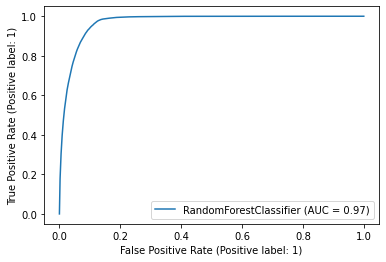

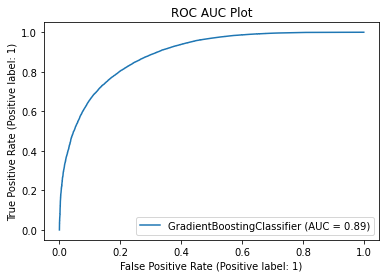

In [51]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

plot_roc_curve(ada_model,x_test,pred)
plot_roc_curve(RD_model,x_test,pred)

plot_roc_curve(RF_model,x_test,pred)
plot_roc_curve(GT_model,x_test,pred)

plt.title('ROC AUC Plot')
plt.show()

## Conclusion:

According to the performance metrics, decisiontreeclassifir scores highest in accuracy. decisiontreeclassifir looks like the best fit for this data.